In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from main import *

In [2]:
sql_file_path = 'queries/1_job_comparison.sql'

In [3]:
queries = read_sql_file(sql_file_path)
connection = connect_to_database()

if connection:
    tables = execute_queries(connection, queries)
    connection.close()

All queries executed successfully!


In [4]:
tables[0].loc[5,'job_title_short'] = 'ML Engineer'
tables[0].sort_values('job_count', ascending=False)


,job_title_short,job_count,avg_salary
4,Data Scientist,7612,139943
2,Data Analyst,6595,97348
3,Data Engineer,6103,134341
0,Business Analyst,617,91071
5,ML Engineer,573,126786
6,Software Engineer,469,112778
1,Cloud Engineer,65,111268


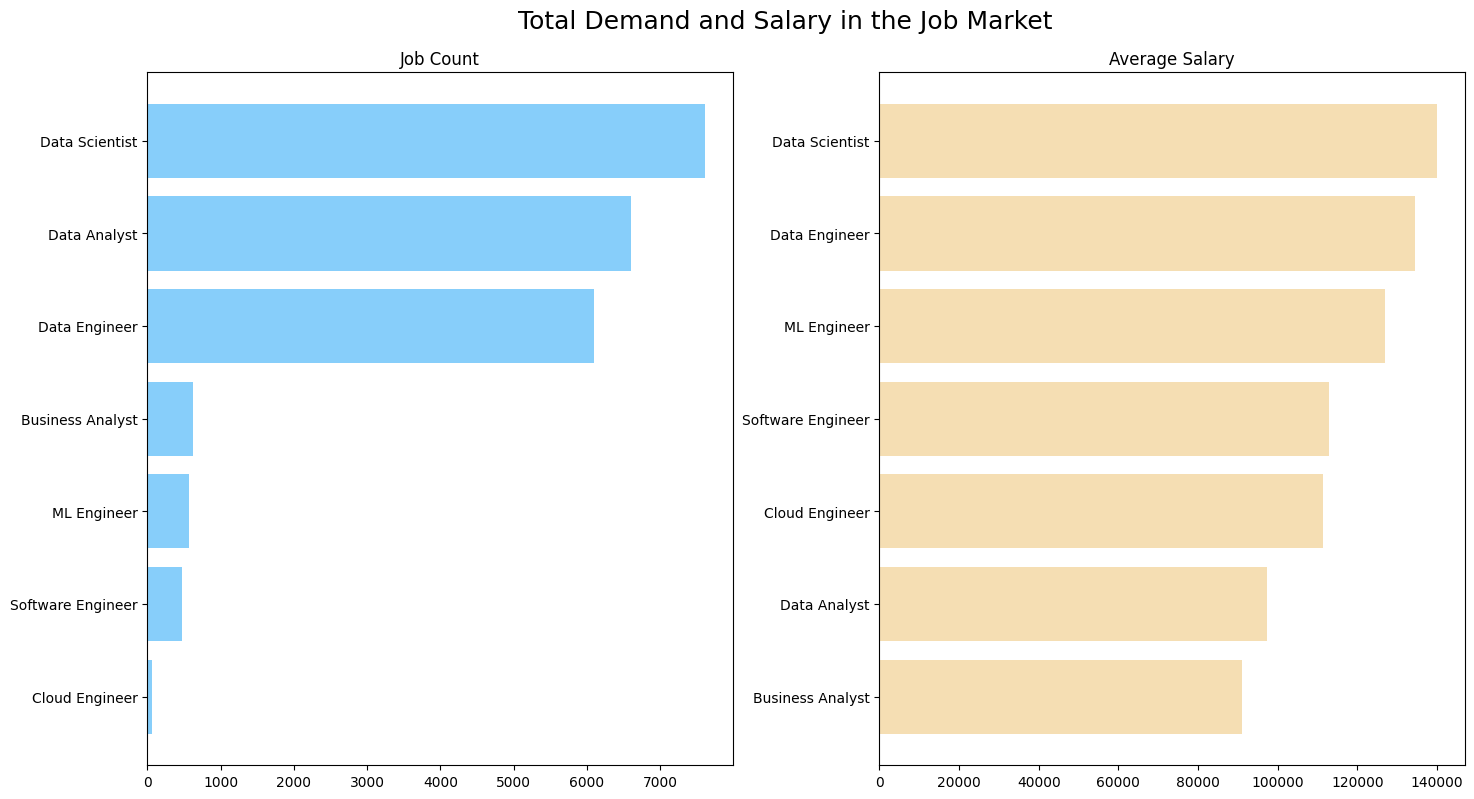

In [20]:
# sorting the tables
job_table_sorted_count = tables[0].sort_values('job_count', ascending=True)
job_table_sorted_salary = tables[0].sort_values('avg_salary', ascending=True)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(17, 9))
plt.subplots_adjust(wspace=0.25)  # adjusting the horizontal space between subplots
fig.suptitle('Total Demand and Salary in the Job Market', fontsize=18, y=0.95)

# plotting the data job market by job count
axs[0].barh('job_title_short', 'job_count', data=job_table_sorted_count, color='lightskyblue')
axs[0].set_title('Job Count')

# plotting the data job market by average salary
axs[1].barh('job_title_short', 'avg_salary', data=job_table_sorted_salary, color='wheat')
axs[1].set_title('Average Salary')

plt.show()

In [ ]:
sql_file_path = 'queries/2_skill_comparison.sql'

In [ ]:
queries = read_sql_file(sql_file_path)
connection = connect_to_database()

if connection:
    tables = execute_queries(connection, queries)
    connection.close()

In [ ]:
tables[3]